<a href="https://colab.research.google.com/github/illeiva2/portfolio/blob/main/Problema_cumpleanios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Primero que nada importamos la librería random que nos va a servir para
# realizar las operaciones aleatorias
import random as rd
# Generamos una lista con las 365 posibilidades de cumpleaños
numeros_1al365 = list(range(1,366))
# Definimos una semilla para reproducibilidad
rd.seed(113)
# La función cumples rebibe como parametro el valor de cantidad de personas
# y devuelve un array de "dias de cumpleaño"
def cumples(k):
  return [rd.choice(numeros_1al365) for x in range(k)]
# hay_coincidencia recibe una lista de cumpleaños y compara su longitud con un
# conjunto constuido con ésta. Si existe diferencia, hay coincidencia y devuelve
# 1, de lo contrario, 0
def hay_coincidencia(cumple):
  conjunto = set(cumple)
  return 1 if len(cumple) != len(conjunto) else 0
# proporcion_coincidencia genera una muestra a partir de los parámetros que le
# pasemos, para luego devolver mediante la suma de los valores devueltos por la
# anterior funcion, la probabilidad de que el evento suceda
def proporcion_coincidencia(k, N):
  muestra = [cumples(k) for x in range(N)]
  return sum(hay_coincidencia(x) for x in muestra) / N
# BONUS TRACK: se define la función equilibrio que mediante un ciclo while,
# calcula en qué punto (cantidad de personas) la probabilidad de que si o si 2
# personas cumplan años el mismo día
def equilibrio():
  i = 0
  while proporcion_coincidencia(i, 1000) != 1 :
    i += 1
  return i


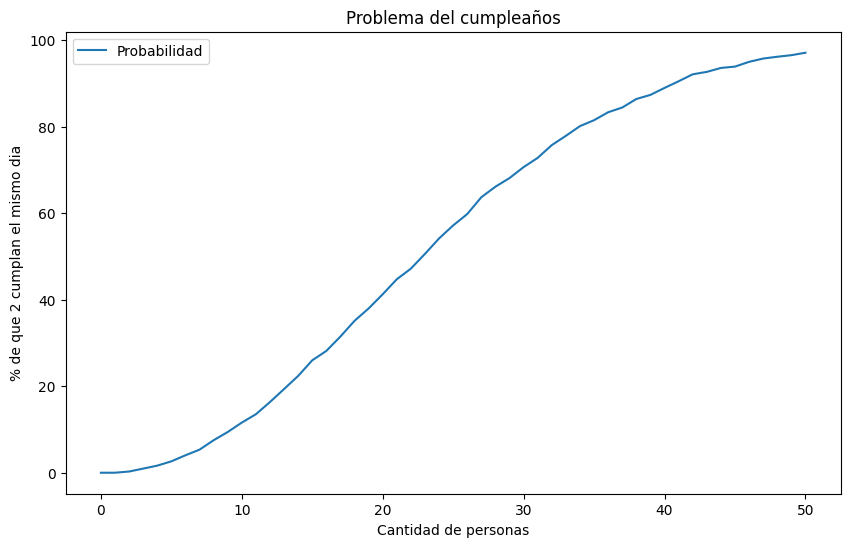

In [24]:
# Importamos todas las librerías necesarias para generar el gráfico
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Generamos el dataframe representando en el eje de las abscisas la cantidad de
# personas y en las ordenadas, la probabilidad mediante la función anterior
# pasando como parametro iterando entre 0 y 50 personas y una repetibilidad de
# N = 1000
data = pd.DataFrame({
    'x': range(0,51),
    'y': [(proporcion_coincidencia(x, 10000) * 100) for x in range(0,51)]
})
plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y'], label='Probabilidad')
plt.xlabel('Cantidad de personas')
plt.ylabel('% de que 2 cumplan el mismo dia')
plt.title('Problema del cumpleaños')
plt.legend()
plt.show()
# Modificando el valor de N, llegamos a la conclusión de que a un N mas bajo,
# obtenemos una dispersión (error) mas alta, y a N mas altos, lo contrario,
# obteniendo con N = 10000 una curva casi constante

## Simulación (ejercicio a entregar)

Armar una simulación basada en $N=1000$ repeticiones que permita estimar la probabilidad de que al menos dos personas en un grupo de $k$ personas elegidas al azar cumpla años el mismo día. Dar una lista de las probabilidades estimadas en función de $k$ para $k$ entre 1 y 50. **[OPCIONAL]** Si es posible, representar esas probabilidades estimadas en un gráfico.

Para la construcción de la simulación, se sugiere seguir la estructura propuesta en el apartado de simulaciones numéricas de este Notebook. Es decir, para un valor de $k$ que hayamos fijado, puede hacerse lo siguiente.

1.  Para el armado del bullet "1. Experimento aleatorio", definir la función ``cumples(k)``, que devuelva ``k`` fechas de cumpleaños (``k`` números entre 1 y 365).
2.  Para el armado del bullet "2: Muestra aleatoria", definir una semilla, fijar ``N`` y armar ``N=1000`` muestras de ``cumples(k)`` que se guarden en ``muestras``.
3.  Para el armado del bullet "3: Una función _filtro_ que caracteriza el evento E", definir la función ``hay_coincidencia(cumples)`` que devuelva ``TRUE`` (o un 1) si hay una coincidencia en una lista ``cumples`` que sea pasada como argumento. Esta es la función que quizás sea más difícil de implementar. Hay muchas formas de hacerlo. Como pista, la función ``set()`` que ya usamos es una estructura de datos ideal para contener objetos sin repeticiones.
4.  Para el armado del bullet "4: Aproximamos P(E) por la proporción de elementos de E en la muestra" contar la proporción de ``hay_coincidencia()`` en las ``N`` repeticiones de la muestra y devolver ese valor.

**[SUGERENCIA]** Como quiere estimarse la probabilidad en las simulaciones para grupos de $k$ personas, donde $k$ varía desde 0 hasta 50 personas, puede crearse una función ``proporcion_coincidencia(k,N)`` que devuelva directamente una aproximación a la probabilidad de coincidencia en función del número de personas ``k``; sin tener que simular las ``N`` repeticiones en cada caso por separado. En esta función ``proporcion_coincidencia(k,N)`` pueden usarse, dentro, las funciones ``cumples()`` y ``hay_coincidencia()``.
